** Title & Business Problem

Customer Segmentation Using Unsupervised Learning

Business Problem

Retail businesses often serve customers with very different purchasing behaviors. Treating all customers the same leads to ineffective marketing campaigns, low retention, and reduced revenue.

The objective of this project is to segment mall customers into distinct groups based on their demographic characteristics and purchasing behavior. These segments can then be used to design targeted marketing strategies and improve customer engagement.

Project Goal

To apply clustering techniques (K-Means) to identify meaningful customer segments that can support business decision-making and personalized marketing.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("data/Mall_Customers.csv")

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset Overview

The dataset contains information about mall customers, including demographic and behavioral attributes.

Features Description

| Feature                | Description                | Business Meaning         |
| ---------------------- | -------------------------- | ------------------------ |
| CustomerID             | Unique identifier          | Not useful for modeling  |
| Gender                 | Male/Female                | Demographic segmentation |
| Age                    | Customer age               | Affects preferences      |
| Annual Income (k$)     | Income in thousand dollars | Purchasing power         |
| Spending Score (1-100) | Score assigned by mall     | Spending behavior        |

Analytical Hypothesis

Customers with similar income levels may exhibit very different spending habits. Therefore, behavioral segmentation is more valuable than purely demographic grouping.

In [14]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Exploratory Data Analysis (EDA)

The goal of EDA is to uncover patterns, relationships, and potential groupings within the dataset before applying machine learning algorithms.

We visualize relationships between variables to determine whether natural clusters exist in the data.

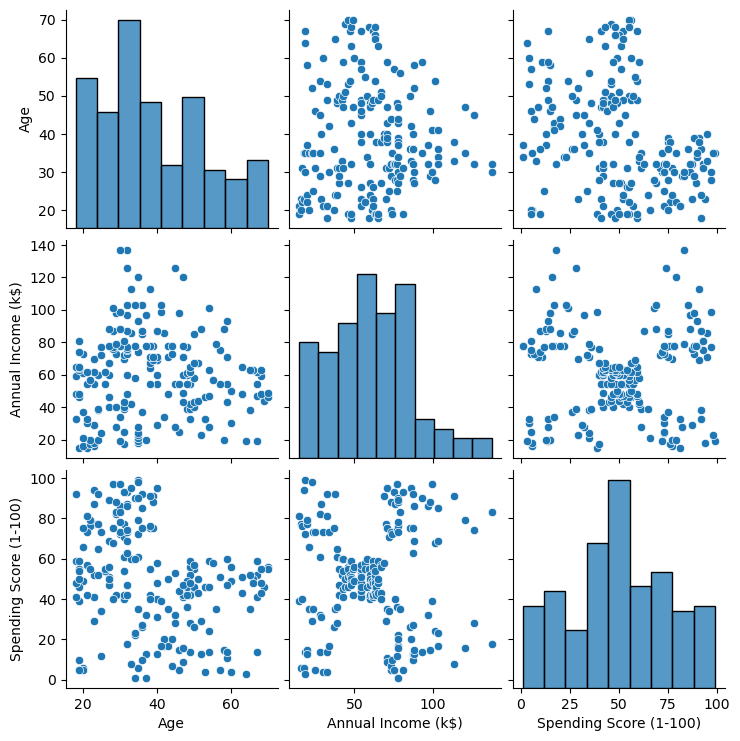

In [17]:
df1= df[['Age','Annual Income (k$)','Spending Score (1-100)']] 
sns.pairplot(df1)

Feature Selection for Clustering

CustomerID is removed because it does not contain meaningful information for grouping customers.

We focus on:

Annual Income

Spending Score

These variables directly represent purchasing capacity and behavior, which are the most relevant factors for customer segmentation.

In [18]:
clustering_features = df1[['Annual Income (k$)','Spending Score (1-100)']]
clustering_features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


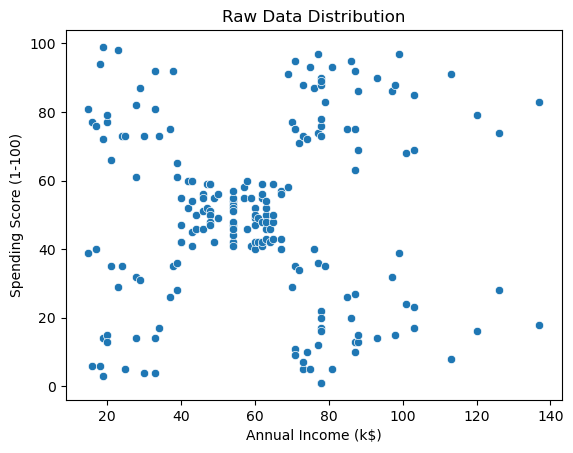

In [19]:
sns.scatterplot(data=clustering_features,x = 'Annual Income (k$)', y= 'Spending Score (1-100)')
plt.title('Raw Data Distribution')
plt.show()

Feature Scaling

K-Means clustering is distance-based and sensitive to scale differences between variables.
Therefore, we standardize the features so each variable contributes equally to the clustering process.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Determining Optimal Number of Clusters

Two evaluation methods are used:

-Elbow Method:

Measures how compact clusters are. The optimal k occurs where inertia reduction slows down.

-Silhouette Score:

Measures how well separated clusters are.
Higher score = better cluster definition.

In [21]:
# ELBPW METHOD
k_range = range(2,11)
empty_inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_features)
    empty_inertias.append(kmeans.inertia_)

    print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")

C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=2: Inertia = 181363.60
k=3: Inertia = 106348.37
k=4: Inertia = 73679.79


C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=5: Inertia = 44448.46
k=6: Inertia = 37233.81
k=7: Inertia = 30241.34


C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=8: Inertia = 25036.42
k=9: Inertia = 21916.79
k=10: Inertia = 20072.07


C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


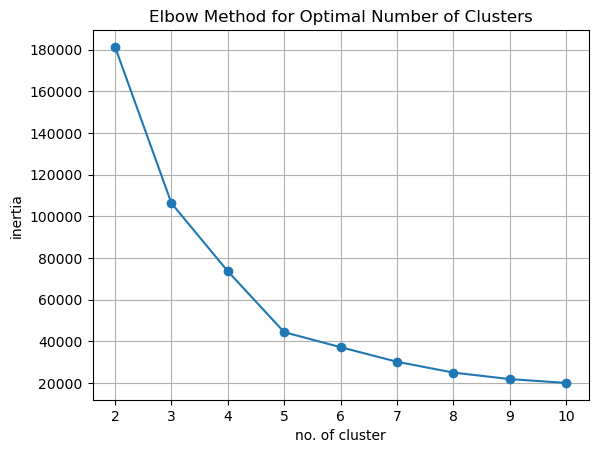

In [22]:
plt.plot(k_range, empty_inertias, 'o-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('no. of cluster')
plt.ylabel('inertia')
plt.grid(True)
plt.show()

In [23]:
# SILHOUETTE SCORE METHOD
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(clustering_features)

    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f'k={k}: Silhouette Score = {silhouette_avg:.3f}')

C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=2: Silhouette Score = 0.297
k=3: Silhouette Score = 0.468
k=4: Silhouette Score = 0.493


C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=5: Silhouette Score = 0.554
k=6: Silhouette Score = 0.540
k=7: Silhouette Score = 0.529


C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=8: Silhouette Score = 0.455
k=9: Silhouette Score = 0.456
k=10: Silhouette Score = 0.441


In [24]:
print(cluster_labels[:10])

[5 3 0 3 5 3 0 3 0 3]


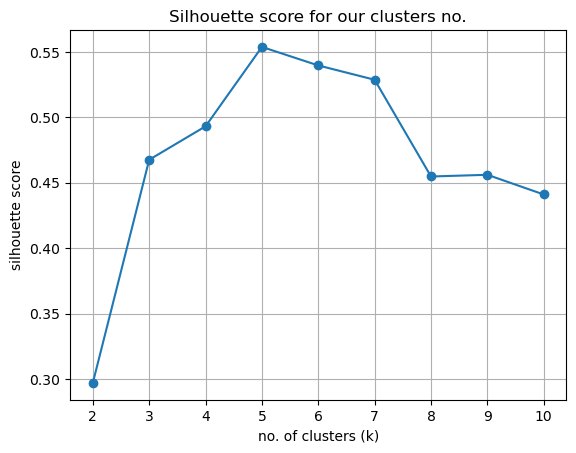

In [25]:
plt.plot(k_range, silhouette_scores, 'o-')
plt.grid(True)
plt.xlabel('no. of clusters (k)')
plt.ylabel('silhouette score')
plt.title('Silhouette score for our clusters no.')
plt.show()

Model Selection Conclusion

Both the Elbow Method and Silhouette Score indicate that 5 clusters provide the best balance between cluster compactness and separation.

**Building the Final K-Means Model

Using the optimal number of clusters (k = 5), we train the final clustering model to segment customers.

In [26]:
final_kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(clustering_features)

C:\Users\tonit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
cluster_labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [28]:
df_clustered = df.copy()
df_clustered['predicted_cluster'] = cluster_labels

In [29]:
df_clustered['predicted_cluster'].unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [30]:
df_clustered.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_cluster
175,176,Female,30,88,86,1
146,147,Male,48,77,36,3
119,120,Female,50,67,57,0
68,69,Male,19,48,59,0
69,70,Female,32,48,47,0


In [31]:
cluster_counts = df_clustered['predicted_cluster'].value_counts()
cluster_counts

predicted_cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

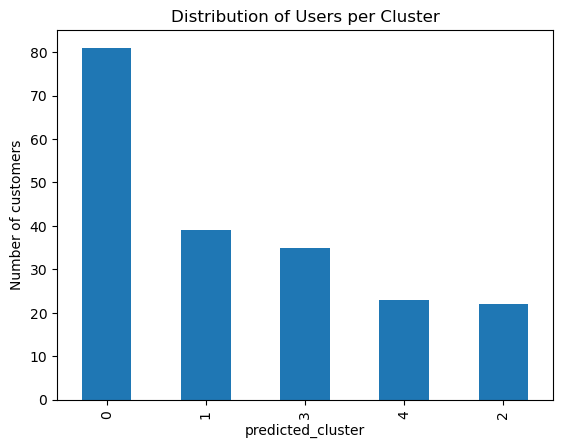

In [32]:
cluster_counts.plot(kind = 'bar')
plt.ylabel('Number of customers')
plt.title('Distribution of Users per Cluster')
plt.show()

Cluster Profiling

After clustering, we analyze the average characteristics of each group to understand customer behavior patterns.

In [33]:
cluster_characteristics = df_clustered.groupby('predicted_cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_characteristics)

,Annual Income (k$),Spending Score (1-100)
predicted_cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


Text(0, 0.5, 'Avg. Values')

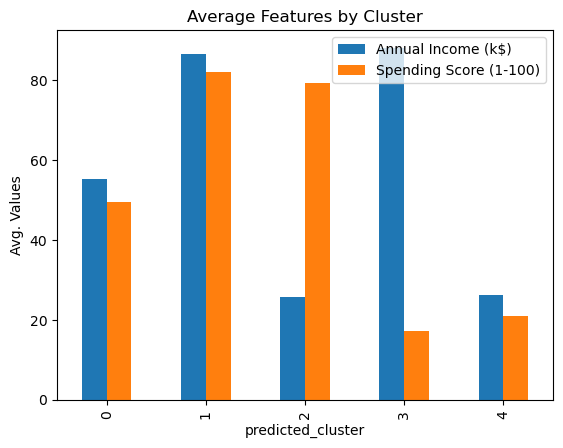

In [34]:
cluster_characteristics.plot(kind='bar')
plt.title('Average Features by Cluster')
plt.ylabel('Avg. Values')

# CLUSTERS CLASSIFICATION

Cluster 0: Mid income, mid spending-- Standard customers

Cluster 1: High income, high spending-- Premium customers

Cluster 2: Low income, high spending-- Impulsive spenders

Cluster 3: High income, low spending-- Careful wealthy customers

Cluster 4: low income, low spending-- Budget customers

** Business Recommendations

* Premium Customers:

Loyalty rewards

VIP memberships

Exclusive product launches

* Impulsive Spenders:

Flash sales

Push notifications

Limited-time offers

Careful Wealthy Customers

Personalized marketing

Product education campaigns

Premium service packages

* Budget Customers:

Discounts and bundles

Coupons

Value deals

* Standard Customers:

Cross-selling recommendations

Seasonal promotions

* Conclusion

This project demonstrates how unsupervised machine learning can be used to understand customer purchasing behavior.
By segmenting customers into meaningful groups, businesses can move from mass marketing to targeted strategies, improving engagement and increasing revenue.

Customer segmentation is therefore a powerful tool for data-driven decision making in retail environments.